Практична робота №4

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Завдання 1

SVM Metrics:
Accuracy: 0.85
Precision: 0.7619047619047619
Recall: 0.9411764705882353
F1 Score: 0.8421052631578947
AUC-ROC: 0.9335038363171355


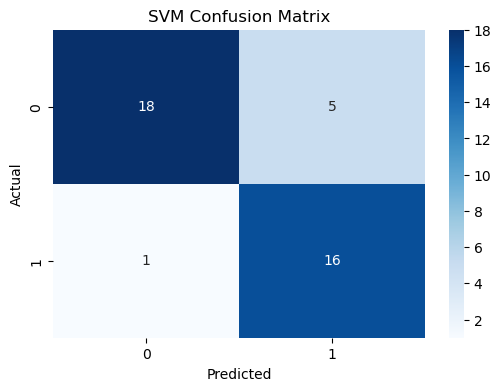

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('classification_dataset.csv')

X = data[['Feature1', 'Feature2']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print("SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, model_svm.decision_function(X_test))}")

confmatr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confmatr, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Завдання 2

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

data = pd.read_csv("multiclass_dataset.csv")

X = data[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

svm_classifier = SVC(kernel='linear', C=1, decision_function_shape='ovr', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", cm_rf)

print("\nSupport Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", cm_svm)

Random Forest Classifier:
Accuracy: 0.7
F1 Score: 0.6821635472370766
Confusion Matrix:
 [[ 4  1  2  0]
 [ 4  3  0  1]
 [ 1  0 11  2]
 [ 0  0  1 10]]

Support Vector Machine (SVM) Classifier:
Accuracy: 0.7
F1 Score: 0.6821635472370766
Confusion Matrix:
 [[ 4  0  3  0]
 [ 5  2  0  1]
 [ 1  1 11  1]
 [ 0  0  0 11]]


Завдання 3

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

data = pd.read_csv("multilabel_dataset.csv")

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multioutput_classifier = MultiOutputClassifier(rf_classifier)
multioutput_classifier.fit(X_train, y_train)
y_pred = multioutput_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
label_names = ['Label1', 'Label2', 'Label3', 'Label4']

print(f"Accuracy: {accuracy}")
for i in range(len(label_names)):
    print(f"\nMetrics for {label_names[i]}:")    
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1[i]}")

Accuracy: 0.475

Metrics for Label1:
Precision: 1.0
Recall: 0.5555555555555556
F1 Score: 0.7142857142857143

Metrics for Label2:
Precision: 0.7307692307692307
Recall: 0.9047619047619048
F1 Score: 0.8085106382978723

Metrics for Label3:
Precision: 0.7368421052631579
Recall: 0.7368421052631579
F1 Score: 0.7368421052631579

Metrics for Label4:
Precision: 0.8571428571428571
Recall: 0.5454545454545454
F1 Score: 0.6666666666666665
